# AM3 Climate Model

In [1]:
from netCDF4 import Dataset

In [2]:
am3 = Dataset("data/GFDL_am3_cli_2009_01.nc", "r", format="NETCDF4")

In [3]:
am3 

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    dimensions(sizes): lonDim(144), latDim(91), plevDim(40), timeDim(1)
    variables(dimensions): float64 lon(lonDim), float64 lat(latDim), float64 plev(plevDim), float64 time(timeDim), float32 cli(plevDim,latDim,lonDim)
    groups: 

In [4]:
%matplotlib inline
from mpl_toolkits.basemap import Basemap  
import numpy as np
import matplotlib.pyplot as plt

In [5]:
lats = am3.variables['lat'][:]
lons = am3.variables['lon'][:]
plev = am3.variables['plev'][:]
time = am3.variables['time'][:]
cli = am3.variables["cli"][:]
plev

masked_array(data=[1004.22 ,  989.009,  973.755,  958.501,  943.247,
                    927.994,  912.741,  897.488,  882.236,  866.984,
                    850.732,  836.481,  818.689,  795.814,  770.398,
                    744.984,  719.574,  694.163,  662.403,  624.298,
                    586.197,  548.105,  500.023,  471.952,  433.897,
                    395.862,  357.85 ,  315.844,  267.025,  226.723,
                    215.583,  177.661,  147.115,  121.25 ,  100.514,
                     83.439,   67.45 ,   48.282,   34.272,   24.08 ],
             mask=False,
       fill_value=1e+20)

In [6]:
lons, lats = np.meshgrid(lons - 180, lats)

In [7]:
lons

masked_array(
  data=[[-180. , -177.5, -175. , ...,  172.5,  175. ,  177.5],
        [-180. , -177.5, -175. , ...,  172.5,  175. ,  177.5],
        [-180. , -177.5, -175. , ...,  172.5,  175. ,  177.5],
        ...,
        [-180. , -177.5, -175. , ...,  172.5,  175. ,  177.5],
        [-180. , -177.5, -175. , ...,  172.5,  175. ,  177.5],
        [-180. , -177.5, -175. , ...,  172.5,  175. ,  177.5]],
  mask=False,
  fill_value=1e+20)

In [8]:
lats

masked_array(
  data=[[-90., -90., -90., ..., -90., -90., -90.],
        [-88., -88., -88., ..., -88., -88., -88.],
        [-86., -86., -86., ..., -86., -86., -86.],
        ...,
        [ 86.,  86.,  86., ...,  86.,  86.,  86.],
        [ 88.,  88.,  88., ...,  88.,  88.,  88.],
        [ 90.,  90.,  90., ...,  90.,  90.,  90.]],
  mask=False,
  fill_value=1e+20)

### Example extraction:

#### ** Climate model at pressure level 600hPa

In [21]:
plev600_cli = cli[21,:,:]
max_plev600 = plev600_cli.max()
min_plev600 = plev600_cli.min()

In [22]:
print("max: %f, min: %f" % (max_plev600,min_plev600))

max: 0.000094, min: -0.000001


Text(0.5, 1.0, 'Am3 Cloud Ice Distribution at Altitude 600hPa (kg/kg)')

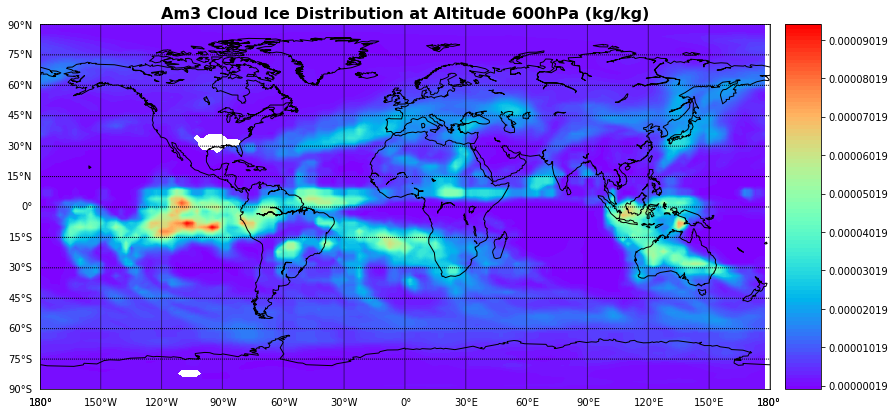

In [23]:
fig = plt.figure(figsize=(14, 14))
m = Basemap()
m.drawcoastlines()
m.drawparallels(np.arange(-90,91,15),labels=[1,0,0,0])
m.drawmeridians(np.arange(m.lonmin,m.lonmax,30),labels=[0,0,0,1])
x,y = m(lons,lats)
cs = m.contourf(x, y, plev600_cli, np.arange(min_plev600, max_plev600, 0.000001), cmap=plt.cm.rainbow)
cb = m.colorbar(cs)
plt.title('Am3 Cloud Ice Distribution at Altitude 600hPa (kg/kg)',fontsize=16, fontweight='bold')

### *** Climate model at pressure level 900 hPa

In [82]:
plev900_cli = cli[8,:,:]
max_plev900 = plev900_cli.max()
min_plev900 = plev900_cli.min()

In [83]:
print("max: %f, min: %f" % (max_plev900,min_plev900))

max: 0.000023, min: -0.000000


Text(0.5, 1.0, 'Am3 Cloud Ice Distribution at Altitude 900hPa (kg/kg)')

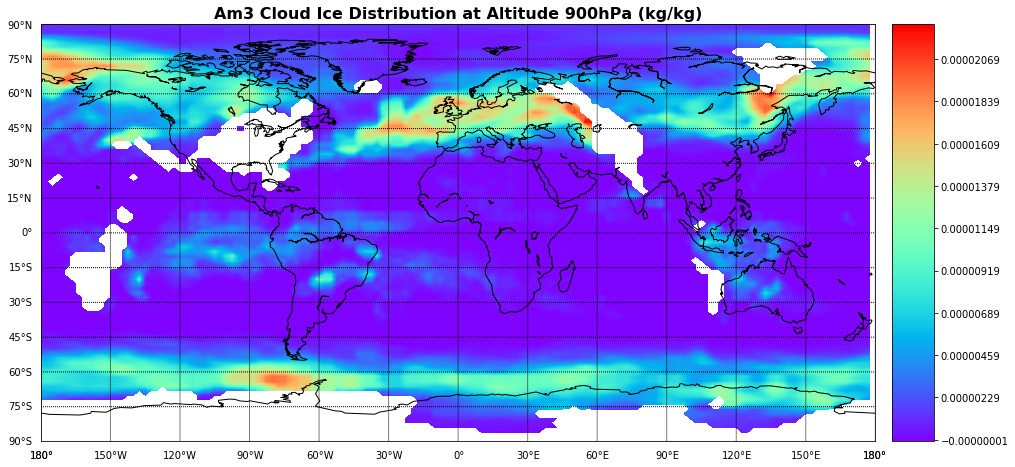

In [84]:
fig = plt.figure(figsize=(16, 16))
m = Basemap()
m.drawcoastlines()
m.drawparallels(np.arange(-90,91,15),labels=[1,0,0,0])
m.drawmeridians(np.arange(m.lonmin,m.lonmax,30),labels=[0,0,0,1])
x,y = m(lons,lats)
cs = m.contourf(x, y,plev900_cli, np.arange(min_plev900,max_plev900,0.0000001), cmap=plt.cm.rainbow)
cb = m.colorbar(cs)

plt.title('Am3 Cloud Ice Distribution at Altitude 900hPa (kg/kg)',fontsize=16, fontweight='bold')

## AM3 Task 2
### Zonal-mean Plot of the Cloud Ice Distribution

In [85]:
average_cli_longitude = cli[:,:,:].mean(axis = 2)

In [86]:
average_cli_longitude

masked_array(
  data=[[--, --, --, ..., 1.1206001444305812e-06, 1.0727957891908268e-06,
         1.0731470562556449e-06],
        [--, --, --, ..., 1.1449923881122636e-06, 1.0925749746901501e-06,
         1.093085706492679e-06],
        [--, --, --, ..., 1.1792980229883042e-06, 1.120392779638577e-06,
         1.121127853467543e-06],
        ...,
        [0.0, 0.0, 0.0, ..., 3.907730040787606e-09,
         3.338854526191426e-09, 3.3714609375894926e-09],
        [0.0, 0.0, 0.0, ..., 2.808994913215833e-09,
         2.2604450656950172e-09, 2.2804952000872922e-09],
        [0.0, 0.0, 0.0, ..., 1.163985648607498e-09,
         8.560676118602513e-10, 8.637281507301648e-10]],
  mask=[[ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, Fal

In [87]:
latitude = am3.variables['lat'][:]

In [88]:
max_ave_cli_lon = average_cli_longitude.max()
min_ave_cli_lon = average_cli_longitude.min()
print("max: %f, min: %f" % (max_ave_cli_lon,min_ave_cli_lon))

max: 0.000052, min: -0.000000


Text(0.5, 1.0, 'The Average Cli of Longitude: AM3 Zonal-mean Plot')

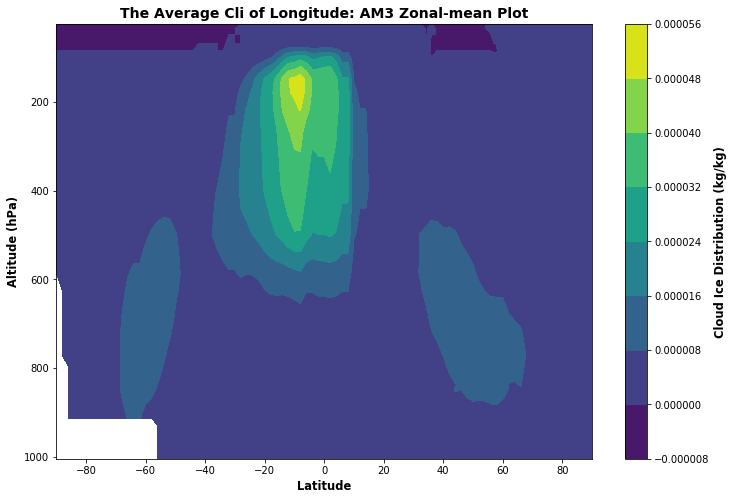

In [135]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
cs = ax.contourf(latitude,plev,average_cli_longitude)
ax.invert_yaxis()
cb = plt.colorbar(cs)
plt.xlabel('Latitude',fontsize = 11.5,fontweight='bold')
plt.ylabel('Altitude (hPa)',fontsize=11.5,fontweight='bold')
cb.set_label('Cloud Ice Distribution (kg/kg)',fontsize = 11.5,fontweight='bold')
plt.title('The Average Cli of Longitude: AM3 Zonal-mean Plot', fontsize=14, fontweight='bold')

## AM3 Task 3
### Cli Profiles of Longitude and Latitude

In [90]:
ave_cli_lat = cli[:,:,:].mean(axis = 1)
ave_both = ave_cli_lat[:,:].mean(axis=1)

In [91]:
max_ave_both = ave_both.max()
min_ave_both = ave_both.min()
print("max: %f, min: %f" % (max_ave_both,min_ave_both))

max: 0.000009, min: 0.000000


In [92]:
am4 = Dataset('data/GFDL_am4_cli_2009_01.nc')

In [93]:
lats4 = am4.variables['lat'][:]
lons4 = am4.variables['lon'][:]
plev4 = am4.variables['plev'][:]
time4 = am4.variables['time'][:]
cli4 = am4.variables["cli"][:]

In [94]:
lons4, lats4 = np.meshgrid(lons4 - 180, lats4)

In [99]:
ave_cli_lat_4 = cli4[:,:,:].mean(axis = 1)
ave_both_4 = ave_cli_lat_4[:,:].mean(axis = 1)

Text(0.5, 1.0, 'AM3 and AM4 Average Cli Profile for Longitude and Latitude')

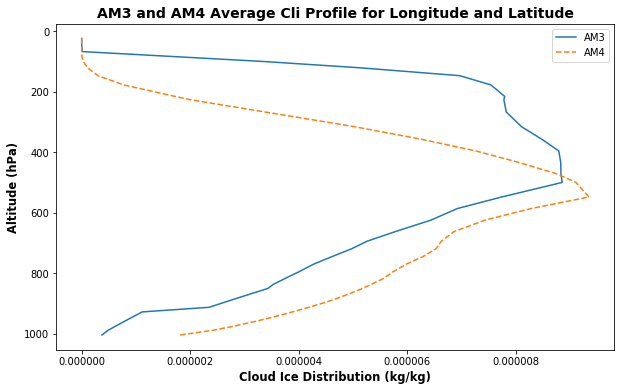

In [133]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
ax.plot(ave_both, plev, '-', label="AM3")
ax.plot(ave_both_4, plev4, '--', label="AM4")
ax.legend()
ax.invert_yaxis()
plt.ylabel('Altitude (hPa)', fontsize = 11.5, fontweight='bold')
plt.xlabel('Cloud Ice Distribution (kg/kg)', fontsize=11.5, fontweight='bold')
plt.title('AM3 and AM4 Average Cli Profile for Longitude and Latitude', fontsize=14, fontweight='bold')